# Bellevue University DSC640 Term Project Milestone 2 – National Database of Childcare Prices (NDCP) Medium Mockup Plan
**Author:** Zicheng (Chance) Xu

**Term:** 2025 Summer

This notebook contains mediums mock-up plan to support **Milestone 2** of the term‑project.
The goal at this stage is building visual mock-ups of the project for the three mediums that I plan to create:
1. Tableau Dashboard (For Infographic type of data demonstration)
2. PowerPoint (For Presentation type of data demonstration)
3. Infographic (For Public-facing Summary type of data demonstration)

## Data Preparation and Export

According to the technical report data dictionary, the columns can be categorized into the following sub categories which we can refer to later in the project (**In the order of the columns in the data, not the data dictionary**):
1. State and County names and codes
2. Study Year
3. Employment and unemployment rates, labor force participation rates, and poverty rates for different age groups and genders
4. Different kinds of income and earnings, including age groups
5. Total population and population by different races
6. Number of households and number of households by age groups and who's working or single mother
7. Percent of civilians emloyed by different occupations and age and gender groups:
    - Management, business,science, and arts
    - Service
    - Sales and office
    - Natural resources, construction, and maintenance
    - Production, transportation, and material moving
8. All other fields with i in the beginning, indicating if that related field was imputed or not

From column index EB in the data:

9. Median prices for center-based care by different age groups
10. Median prices of family child care by different age groups
11. 75th percentile price of center based care by different age groups
12. 75th percentile price of family child care by different age groups
13. All other fields with i in the beginning, value indicating summary of imputations made to the related field

From column index HL in the data:

14. Median prices for center-based care aggregated weekly by infant, toddler, preschool groups
15. 75th percentile price of center based care by infant, toddler, preschool groups
16. Median prices of family child care aggregated weekly by infant, toddler, preschool groups
17. 75th percentile price of family child care by infant, toddler, preschool groups

From column index IJ in the data:

18. State FIPS Code
19. Employment and unemployment rates, labor foce participation rates, and poverty rates for different age groups and genders, at the **state level**
20. Different kinds of income and earnings, including age groups, at the **state level**
21. Total population and population by different races, at the **state level**
22. Number of households and number of households by age groups and who's working or single mother, at the **state level**
23. Percent of civilians emloyed by different occupations and age and gender groups, at the **state level**:
    - Management, business,science, and arts
    - Service
    - Sales and office
    - Natural resources, construction, and maintenance
    - Production, transportation, and material moving
24. All other fields with i in the beginning, indicating if that related field was imputed or not

For this milestone, we will start off creating a cleaned and enriched dataset that inclues:
- State
- County
- Year
- Center_Price
- Family_Price
- Discount_%
- Price_Quartile

From which we will be able to use for visualization for all three mediums. 

For the simplicity of this milestone, our real actions on the coding, Tableau and Powerpoint slides will be focusing on county level, and gender neutral and we will add state levels and gender difference later when we finish up the project.

### Load and Filter Data

In [17]:
# Initial loading of necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# display options
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (10, 6)

In [18]:
DATA_PATH = Path('NDCP2022.xlsx')  # I put the file in same directory as the notebook

# Checking the file existence
if not DATA_PATH.exists():
    raise FileNotFoundError('Please make sure NDCP2022.xlsx is in the working directory.')

# peek at sheet names & first few rows to confirm layout
xl = pd.ExcelFile(DATA_PATH, engine='openpyxl')
print('Sheets:', xl.sheet_names)
df_head = xl.parse(xl.sheet_names[0], nrows=5)
display(df_head.head())

Sheets: ['County_LevelNDCP_v8_update2008_']


,STATE_NAME,STATE_ABBREVIATION,COUNTY_NAME,COUNTY_FIPS_CODE,STUDYYEAR,EMR_16,FEMR_16,MEMR_16,EMR_20to64,FEMR_20to64,MEMR_20to64,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,MUNR_20to64,FLFPR_20to64,FLFPR_20to64_UNDER6,FLFPR_20to64_6to17,FLFPR_20to64_UNDER6_6to17,MLFPR_20to64,PR_F,PR_P,MHI,MFI,MFI_2022,ME,FME,MME,MHI_2022,ME_2022,FME_2022,MME_2022,TOTALPOP,ONERACE,ONERACE_W,ONERACE_B,ONERACE_I,ONERACE_A,ONERACE_H,ONERACE_OTHER,TWORACES,HISPANIC,HOUSEHOLDS,H_UNDER6_BOTHWORK,H_UNDER6_FWORK,H_UNDER6_MWORK,H_UNDER6_SINGLEM,H_6to17_BOTHWORK,H_6to17_FWORK,H_6to17_MWORK,H_6to17_SINGLEM,EMP_M,MEMP_M,FEMP_M,EMP_SERVICE,MEMP_SERVICE,FEMP_SERVICE,EMP_SALES,MEMP_SALES,FEMP_SALES,EMP_N,MEMP_N,FEMP_N,EMP_P,MEMP_P,FEMP_P,iEMR_16,iFEMR_16,iMEMR_16,iEMR_20to64,iFEMR_20to64,iMEMR_20to64,iUNR_16,iFUNR_16,iMUNR_16,iUNR_20to64,iFUNR_20to64,iMUNR_20to64,iFLFPR_20to64,iFLFPR_20to64_UNDER6,iFLFPR_20to64_6to17,iFLFPR_20to64_UNDER6_6to17,iMLFPR_20to64,iPR_F,iPR_P,iMHI,iMFI,iME,iFME,iMME,iMHI_2022,iMFI_2022,iME_2022,iFME_2022,iMME_2022,iTOTALPOP,iONERACE,iONERACE_W,iONERACE_B,iONERACE_I,iONERACE_A,iONERACE_H,iONERACE_OTHER,iTWORACES,iHISPANIC,iHOUSEHOLDS,iH_UNDER6_BOTHWORK,iH_UNDER6_FWORK,iH_UNDER6_MWORK,iH_UNDER6_SINGLEM,iH_6to17_BOTHWORK,iH_6to17_FWORK,iH_6to17_MWORK,iH_6to17_SINGLEM,iEMP_M,iMEMP_M,iFEMP_M,iEMP_SERVICE,iMEMP_SERVICE,iFEMP_SERVICE,iEMP_SALES,iMEMP_SALES,iFEMP_SALES,iEMP_N,iMEMP_N,iFEMP_N,iEMP_P,iMEMP_P,iFEMP_P,MCBto5,MC6to11,MC12to17,MC18to23,MC24to29,MC30to35,MC36to41,MC42to47,MC48to53,MC54toSA,MCSA,MFCCBto5,MFCC6to11,MFCC12to17,MFCC18to23,MFCC24to29,MFCC30to35,MFCC36to41,MFCC42to47,MFCC48to53,MFCC54toSA,MFCCSA,_75CBto5,_75C6to11,_75C12to17,_75C18to23,_75C24to29,_75C30to35,_75C36to41,_75C42to47,_75C48to53,_75C54toSA,_75CSA,_75FCCBto5,_75FCC6to11,_75FCC12to17,_75FCC18to23,_75FCC24to29,_75FCC30to35,_75FCC36to41,_75FCC42to47,_75FCC48to53,_75FCC54toSA,_75FCCSA,iMCBto5,iMC6to11,iMC12to17,iMC18to23,iMC24to29,iMC30to35,iMC36to41,iMC42to47,iMC48to53,iMC54toSA,iMCSA,iMFCCBto5,iMFCC6to11,iMFCC12to17,iMFCC18to23,iMFCC24to29,iMFCC30to35,iMFCC36to41,iMFCC42to47,iMFCC48to53,iMFCC54toSA,iMFCCSA,i_75CBto5,i_75C6to11,i_75C12to17,i_75C18to23,i_75C24to29,i_75C30to35,i_75C36to41,i_75C42to47,i_75C48to53,i_75C54toSA,i_75CSA,i_75FCCBto5,i_75FCC6to11,i_75FCC12to17,i_75FCC18to23,i_75FCC24to29,i_75FCC30to35,i_75FCC36to41,i_75FCC42to47,i_75FCC48to53,i_75FCC54toSA,i_75FCCSA,MCINFANT,MCInfant_flag,MCTODDLER,MCToddler_flag,MCPRESCHOOL,MCPreschool_flag,_75CINFANT,_75CInfant_flag,_75CTODDLER,_75CToddler_flag,_75CPRESCHOOL,_75CPreschool_flag,MFCCINFANT,MFCCInfant_flag,MFCCTODDLER,MFCCToddler_flag,MFCCPRESCHOOL,MFCCPreschool_flag,_75FCCINFANT,_75FCCInfant_flag,_75FCCTODDLER,_75FCCToddler_flag,_75FCCPRESCHOOL,_75FCCPreschool_flag,STATE_FIPS,EMR_16_STATE,FEMR_16_STATE,MEMR_16_STATE,EMR_20to64_STATE,FEMR_20to64_STATE,MEMR_20to64_STATE,UNR_16_STATE,FUNR_16_STATE,MUNR_16_STATE,UNR_20to64_STATE,FUNR_20to64_STATE,MUNR_20to64_STATE,FLFPR_20to64_STATE,FLFPR_20to64_UNDER6_STATE,FLFPR_20to64_6to17_STATE,FLFPR_20to64_UNDER6_6to17_STATE,MLFPR_20to64_STATE,PR_F_STATE,PR_P_STATE,MHI_STATE,MFI_STATE,MFI_2022_STATE,ME_STATE,FME_STATE,MME_STATE,MHI_2022_STATE,ME_2022_STATE,FME_2022_STATE,MME_2022_STATE,TOTALPOP_STATE,ONERACE_STATE,ONERACE_W_STATE,ONERACE_B_STATE,ONERACE_I_STATE,ONERACE_A_STATE,ONERACE_H_STATE,ONERACE_OTHER_STATE,TWORACES_STATE,HISPANIC_STATE,HOUSEHOLDS_STATE,H_UNDER6_BOTHWORK_STATE,H_UNDER6_FWORK_STATE,H_UNDER6_MWORK_STATE,H_UNDER6_SINGLEM_STATE,H_6to17_BOTHWORK_STATE,H_6to17_FWORK_STATE,H_6to17_MWORK_STATE,H_6to17_SINGLEM_STATE,EMP_M_STATE,MEMP_M_STATE,FEMP_M_STATE,EMP_SERVICE_STATE,MEMP_SERVICE_STATE,FEMP_SERVICE_STATE,EMP_SALES_STATE,MEMP_SALES_STATE,FEMP_SALES_STATE,EMP_N_STATE,MEMP_N_STATE,FEMP_N_STATE,EMP_P_STATE,MEMP_P_STATE,FEMP_P_STATE,iEMR_16_STATE,iFEMR_16_STATE,iMEMR_16_STATE,iEMR_20to64_STATE,iFEMR_20to64_STATE,iMEMR_20to64_STATE,iUNR_16_STATE,iFUNR_16_STATE,iMUNR_16_STATE,iUNR_20to64_STATE,iFUNR_20to64_STATE,iMUNR_20to64_STATE,iFLFPR_20to64_STATE,iFLFPR_2

Data looks good, let's do full load.

In [28]:
# df = xl.parse(xl.sheet_names[0])
# print('Shape:', df.shape)
# Commented out to focus on columns for this milestone only

In [32]:
# Define only the columns we need
use_cols = [
    'STATE_NAME', 'COUNTY_NAME', 'STUDYYEAR',
    'MCINFANT', 'MFCCINFANT', 'MHI', 'PR_P', 'TOTALPOP',
    'EMP_M', 'EMP_SERVICE', 'EMP_SALES', 'EMP_N', 'EMP_P'
]

# Load only selected columns
df = pd.read_excel("NDCP2022.xlsx", usecols=use_cols)

# Rename for clarity
df = df.rename(columns={
    'STATE_NAME': 'State',
    'COUNTY_NAME': 'County',
    'STUDYYEAR': 'Year',
    'MCINFANT': 'Center_Care_Medium_Price_Infant',
    'MFCCINFANT': 'Family_Care_Medium_Price_Infant',
    'MHI': 'Median_Household_Income',
    'PR_P': 'Poverty_Rate',
    'TOTALPOP': 'Total_Population',
    'EMP_M': 'Pct_Employed_Management',
    'EMP_SERVICE': 'Pct_Employed_Service',
    'EMP_SALES': 'Pct_Employed_Sales',
    'EMP_N': 'Pct_Employed_Construction',
    'EMP_P': 'Pct_Employed_Production'
})

# Filter out invalid or zero values
df = df[(df['Center_Care_Medium_Price_Infant'] > 0) & (df['Family_Care_Medium_Price_Infant'] > 0)]

# Compute discount %
df['Family_Care_to_Center_Care_Discount%'] = (
    (df['Center_Care_Medium_Price_Infant'] - df['Family_Care_Medium_Price_Infant']) / df['Center_Care_Medium_Price_Infant']
).round(4)

# Assign quartiles based on center-based price
df['Center_Care_Price_Quartile'] = pd.qcut(
    df['Center_Care_Medium_Price_Infant'],
    q=4,
    labels=["Q1 (Low Cost)", "Q2", "Q3", "Q4 (High Cost)"]
)

# Assign quartiles based on family-based price
df['Family_Care_Price_Quartile'] = pd.qcut(
    df['Family_Care_Medium_Price_Infant'],
    q=4,
    labels=["Q1 (Low Cost)", "Q2", "Q3", "Q4 (High Cost)"]
)

# Check the stats and head of the df
print('DataFrame dimension: ', df.shape)
print('Some stats of the DataFrame: ', df.info())
print('Top row examples:')
df.head()

DataFrame dimension:  (34784, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 34784 entries, 0 to 48307
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   State                                 34784 non-null  object  
 1   County                                34784 non-null  object  
 2   Year                                  34784 non-null  int64   
 3   Poverty_Rate                          34784 non-null  float64 
 4   Median_Household_Income               34784 non-null  int64   
 5   Total_Population                      34784 non-null  int64   
 6   Pct_Employed_Management               34784 non-null  float64 
 7   Pct_Employed_Service                  34784 non-null  float64 
 8   Pct_Employed_Sales                    34784 non-null  float64 
 9   Pct_Employed_Construction             34784 non-null  float64 
 10  Pct_Employed_Production               347

,State,County,Year,Poverty_Rate,Median_Household_Income,Total_Population,Pct_Employed_Management,Pct_Employed_Service,Pct_Employed_Sales,Pct_Employed_Construction,Pct_Employed_Production,Center_Care_Medium_Price_Infant,Family_Care_Medium_Price_Infant,Family_Care_to_Center_Care_Discount%,Center_Care_Price_Quartile,Family_Care_Price_Quartile
0,Virginia,Arlington County,2022,6.7,137387,235845,73.3,8.8,12.2,2.5,3.3,559.34,384.54,0.3125,Q4 (High Cost),Q4 (High Cost)
2,Virginia,Falls Church City,2022,2.3,164536,14576,71.2,10.0,14.2,2.2,2.5,429.06,287.04,0.3310,Q4 (High Cost),Q4 (High Cost)
4,California,San Francisco County,2022,10.5,136689,851036,62.0,13.5,16.2,2.8,5.6,606.61,395.36,0.3482,Q4 (High Cost),Q4 (High Cost)
5,Virginia,Loudoun County,2022,3.8,170463,420773,62.1,11.9,16.5,3.9,5.5,365.91,280.59,0.2332,Q4 (High Cost),Q4 (High Cost)
7,Virginia,Falls Church City,2020,2.0,146922,14309,71.2,11.6,12.7,1.9,2.5,398.33,250.00,0.3724,Q4 (High Cost),Q4 (High Cost)


Data looks good, let's export the data for Tableau dashoard.

### Export Data

In [37]:
df.to_csv("tableau_childcare_export.csv", index=False)

## 1. Tableau Dashboard Mock-up

### Target Audience
Policy makers and stakeholders interested in addressing childcare affordability across counties.

For this medium, I will cover mock-up visual that include the following:
1. U.S. Infant Childcare Prices Map
 - Color-coded by Average of Center_Care_Medium_Price_Infant and Family_Care_Medium_Price_Infant, separately
 - Filter by Year, quartiles
 - Color difference/scaling to visualize states with high/middle/low weekly infant care cost
 - tooltip to show the metric number and the top priced counties within each state

2. Summary Table
 - Allows users/audience to filter by different attributes to drill down the details of prices and other data for better decision making

### Visualization Mock-up 1

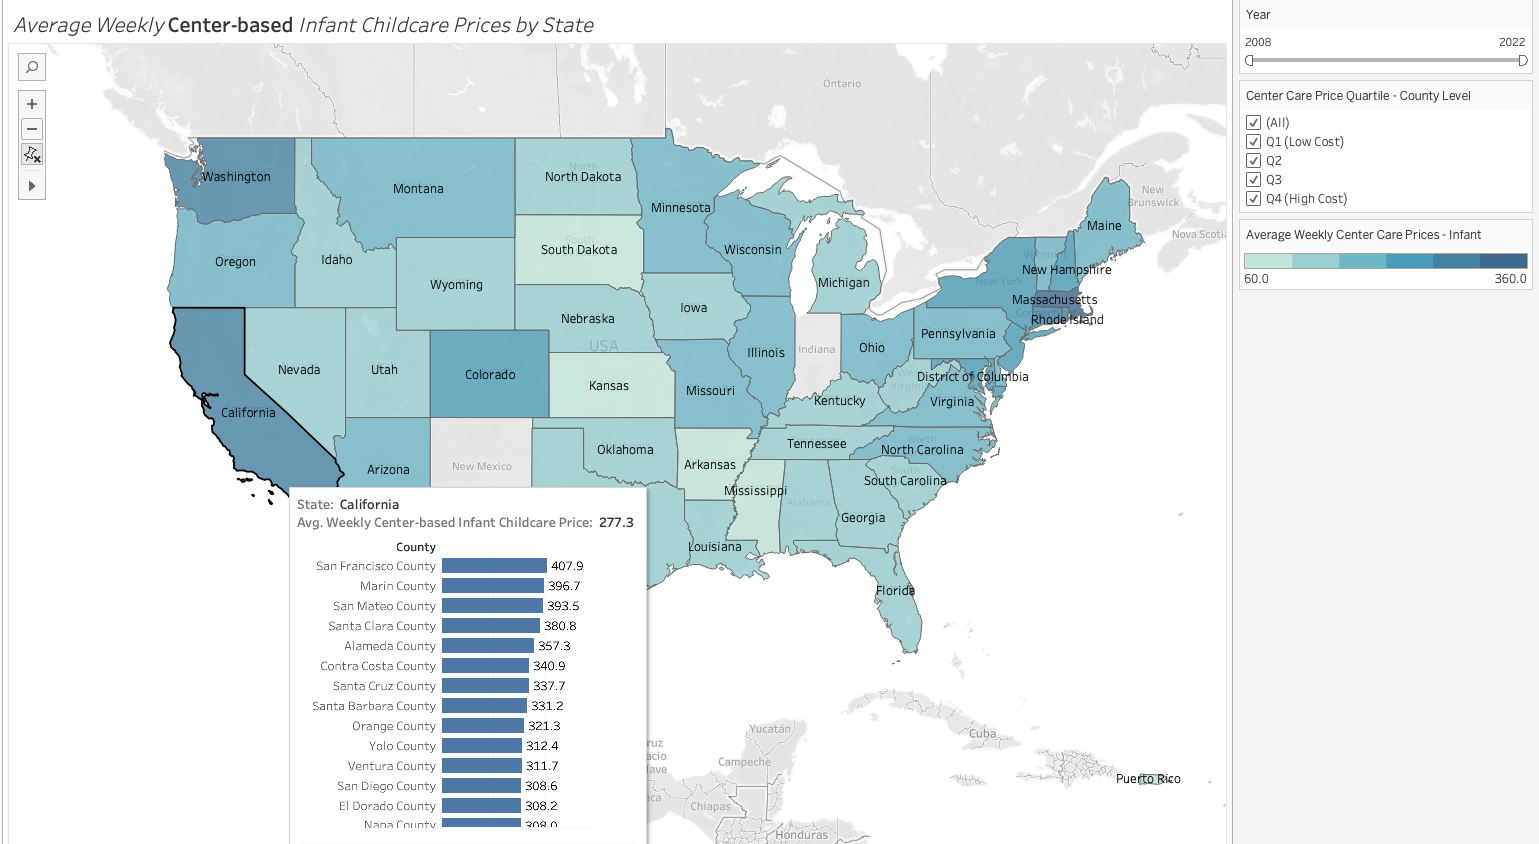

Clearly the coastal states, as well as Colorado (where there're emerging number of billionaires), have the highest average weekly center care prices for infants.

### Visualization Mock-up 2

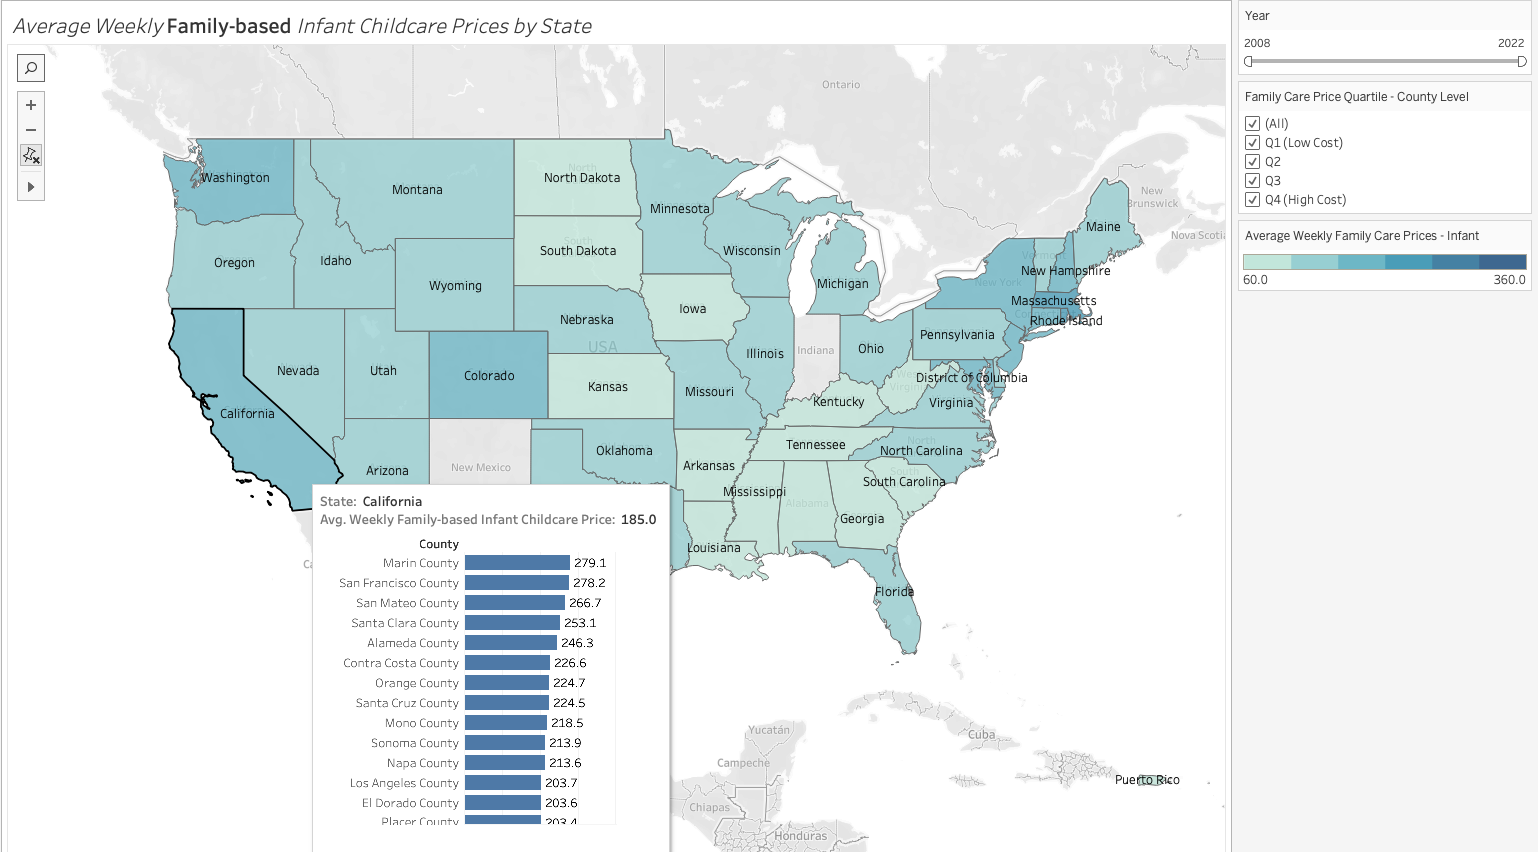

Same trend as the center-based childcare prices, but cheaper since we are using the same color scale and the colors are clearly lighter here.

### Visualization Mock-up 3

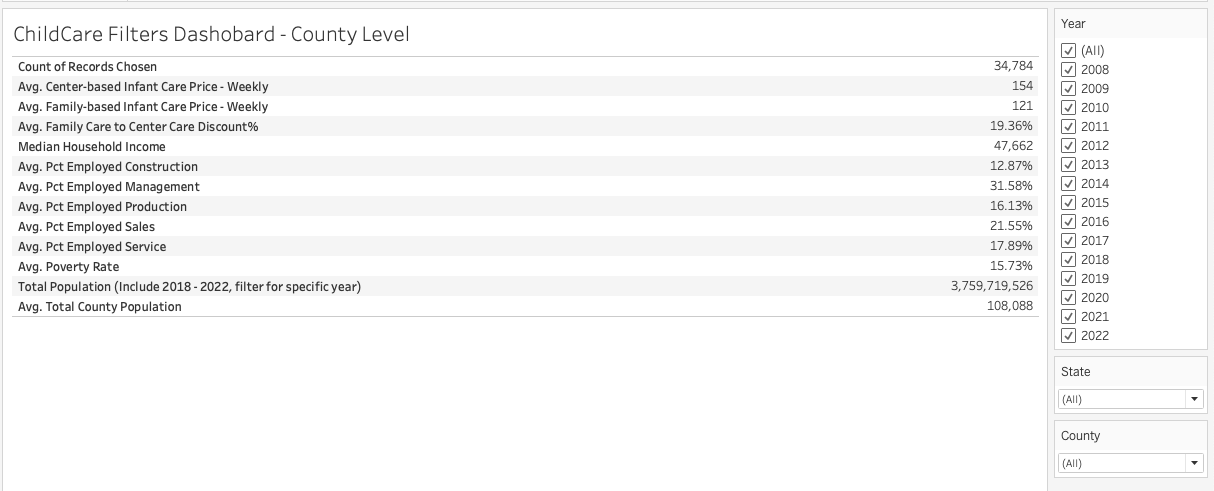

The summary dashboard above allows for more detailed drill down on specific year(s), state(s), and county(ies) after analyzing the maps. This dashoboard currently gives information on record count, average center price vs family price, average family price discount%, medium household income, average employement rate by occupation, average poverty rate, total population and average county population from the filter, allowing policymakers to make more seasoned decisions on the pricing of childcares, at different granularities (nation-wide vs state-wide, for instance). 

Next action items on this medium include adding more useful visualizations with filtering functions to be eventually added to the final dashboard so our target audience will be able to interact with it for policy-making, pricing or any other purposes.

## 2. Powerpoint Mock-up

### Target Audience
State legislators, County economic development boards, Childcare policy advocates, or anyone evaluating affordability and access to childcare.

For this medium, we will build a slide deck that communicates key insights + strategic implications from my childcare data analysis to a non-technical policy-oriented audience.

### Slide Mock-up

**1. Title Slide**
- Title: “Understanding Infant Childcare Affordability in the U.S.”
- Subtitle: A Data-Driven Look at Center-Based vs. Family-Based Pricing (2008–2022)
- Zicheng (Chance) Xu
- DSC640

**2. Study Purpose**
- Brief summary:
    - Rising costs of infant childcare
    - Center-based care is often more expensive than family-based
    - Policy opportunities to reduce cost burden

**3. National Price Trends Over Time**
- Line chart from Milestone 1
    - “National Median Weekly Infant Childcare Price (Center-Based)”
- Annotation: Steady price increase, especially post-2015

**4. Price vs. Labor Force Participation**
- Scatter plot + trend line
    - “Childcare Price vs. Mother’s Labor Force Participation Rate (age 20–64, child <6 yrs) from Milestone 1”
- Interpretation: Slight positive correlation

**5. Regional Cost Disparities**
- Screenshot of center-based care map
- Callout: Certain states/clusters with higher prices, calculated as average of medium prices of all counties in a state
    - Costal States have higher prices
- cost to living ratio from Milestone 1 shows some areas, even though not coastal, have really high such ratios

**6. Family-Based Care Comparison**
- Screenshot of family-based care map
- Callout: Certain states/clusters with higher prices, calculated as average of medium prices of all counties in a state
    - Costal States have higher prices, same as the center-based
    - Greater affordability in many states
- cost to living ratio from Milestone 1 shows some areas, even though not coastal, have really high such ratios
    - But much lower (half of what) than center based
    - Insight: Family care provides a lower-cost alternative 

**7. Family-Care Discounts by Region**
- Histogram (from Milestone 1)
- Average family-care discount in TOP 25 % cost counties: 26.6%
- Average family-care discount in TOP 10 % cost counties: 29.9%

**8. Summary Statistics**
- Screenshot of Tableau stats worksheet
- Filters enabled: lets users explore Year, State, Quartile
- Emphasize: supports policy customization by geography

**9. Policy Implications & Recommendations**
- Bullet points:
    - Focus subsidy/support on top-quartile cost counties
    - Incentivize or expand family-based care in high-cost areas
    - Combine cost insights with occupation data to design workforce reentry programs for parents

This PowerPoint slide deck is designed for state-level policymakers and childcare advocates. It introduces national and regional trends in infant childcare pricing from 2008 to 2022, compares center-based and family-based care costs, and illustrates where family care can significantly reduce financial burdens. Using Tableau and Python-driven insights, we identify top-quartile counties by cost and highlight where policy intervention may be most impactful. The slide deck includes historical pricing trends, spatial maps, labor force relationships, and discount breakdowns—culminating in specific policy recommendations. This format allows a live presentation with data-driven storytelling while keeping insights accessible to a non-technical audience.

## 3. Infographic

### Target Audience
Create a visually compelling infographic that communicates key findings to a broad audience (parents, community leaders, general public), focusing on affordability, disparities, and impact.

### Infographic Mock-up

My current plan is to design the structure like a vertical or modular visual, with the following logical sections:

**Title**
 - “What Does Infant Childcare Really Cost in the U.S.?”
 - Subtitle: A visual look at center-based vs. family-based care across U.S. counties (2008 - 2022)

**Section 1: National Price Trends**
 - Line chart or icon timeline:
    - Median center-based care prices over time (2008–2022)
 - Annotation: “Prices have steadily increased, reaching over $170 per week nationally in 2022.”

**Section 2: How Much Does It Vary by County?**
 - U.S. map graphic:
    - High vs. low cost regions
 - Text box:
    - “In some counties, weekly infant care costs exceed $400. In others, it’s less than $20.”

**Section 3: Center vs. Family Care**
 - Side-by-side bar chart or icons:
    - Avg. center-based vs. family-based care prices
 - Include discount stat:
    - “In the top 25% most expensive counties, family care is 26.6% cheaper on average.”
  
**Section 4: Top 10 Counties**
 - Small table or icon grid:
    - Top 10 counties with the highest center-based care cost ratios
 - Optional: show same for family-based

**Section 5: Why This Matters**
 - Text with icons (e.g., working parent, dollar sign, baby)
    - “High childcare costs limit access for working parents, especially single mothers.”
  
**Section 6: What Can Be Done?**
 - Call to action / summary panel:
    - Fund/support family care in top-cost areas
    - Align job reentry programs with care affordability zones
    - Provide cost transparency tools by region

This infographic is designed for the general public and community stakeholders. It summarizes key findings from our analysis of 2008 - 2022 U.S. infant childcare data, comparing center-based and family-based care prices across counties. The infographic highlights national price trends, county-level disparities, average discounts, and the top 10 most expensive areas. Its purpose is to raise awareness about childcare affordability and prompt public dialogue around funding priorities and access strategies. By keeping visuals simple and impactful, it ensures that families and advocates—regardless of data literacy—can understand the challenges and potential solutions.